# Prosper Loan Data Analysis
## by Lynn Majerome

## Investigation Overview


> The main objective of the analysis is to examine the connections between different features in the Prosper loan dataset, including loan amount, interest rate, employment status, income range, and debt to income ratio.Through this analysis, we aim to uncover patterns and trends in the data and gain a better understanding of the characteristics of the loan data and the factors that may affect the borrower's interest rate.

## Dataset Overview

> The dataset being analyzed is a data set from Prosper Loan, a peer-to-peer lending lending company. The data includes features such as loan amount, borrower rate, employment status, income range, and debt to income ratio. 
The dataset can be found [here](https://www.kaggle.com/datasets/shikhar07/prosper-loan-data)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
!pip install -U matplotlib seaborn

Requirement already up-to-date: matplotlib in /opt/conda/lib/python3.6/site-packages (3.3.4)
Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


In [3]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('loans.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Income Bracket

> The plot allows us to visualize the distribution of borrower income in the data set and gain insight into which income brackets are more represented among the borrowers. It gives us a clearer picture of the financial backgrounds of the borrowers in the data set. 

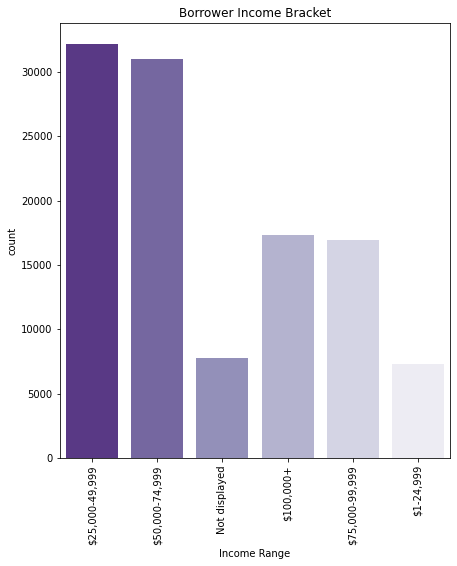

In [4]:
plt.figure(figsize=(7,8))

# Values to drop
to_drop = ['Not employed', '$0']

# df with with new values
dropped_range = loans[~loans['IncomeRange'].isin(to_drop)]

#create the countplot
g=sns.countplot(x='IncomeRange', data=dropped_range,palette='Purples_r')
plt.xticks(rotation=90)
plt.xlabel('Income Range')
plt.title('Borrower Income Bracket');

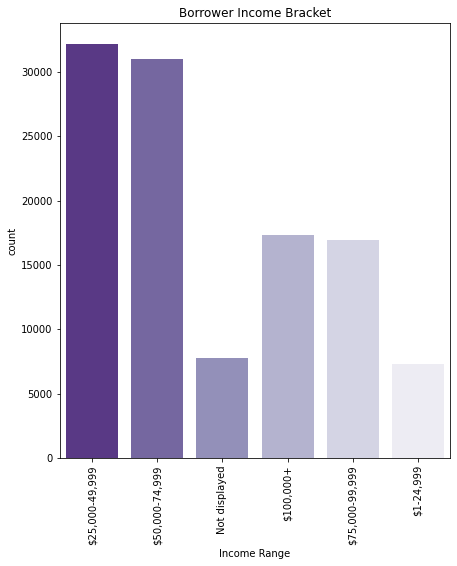

## Employment Status

> The plot shows the number of loans taken out by borrowers in each employment category. Most borrowers in this dataset are employed, followed by full-time, self-employed, and part-time. There are fewer borrowers who fall into the category retired. This information can be useful for understanding the employment status of the borrowers in the loan data and how it may affect their ability to make loan payments.

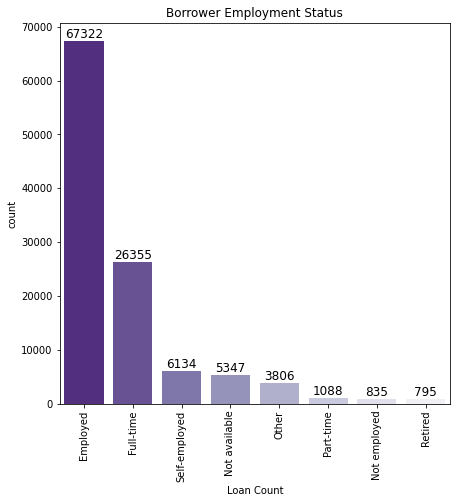

In [5]:
plt.figure(figsize=(7,7))

# Create the countplot
g = sns.countplot(x='EmploymentStatus', data=loans, palette='Purples_r',
                  order=['Employed','Full-time', 'Self-employed', 
                    'Not available', 'Other','Part-time', 'Not employed', 'Retired'])
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.xlabel('Loan Count')
plt.title('Borrower Employment Status');

# Add labels to the bars
for p in g.patches:
    g.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

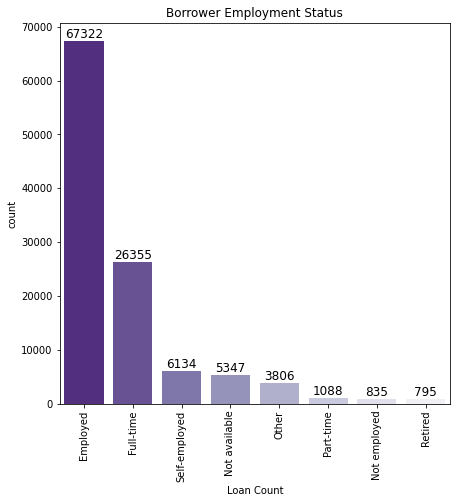

## Interest Rate according to Employment Status
> The violin plot displays the range of interest rates for each employment status, with the thicker part of the "violin" representing a higher density of data points. This allows us to see how the interest rates vary among the different employment statuses.

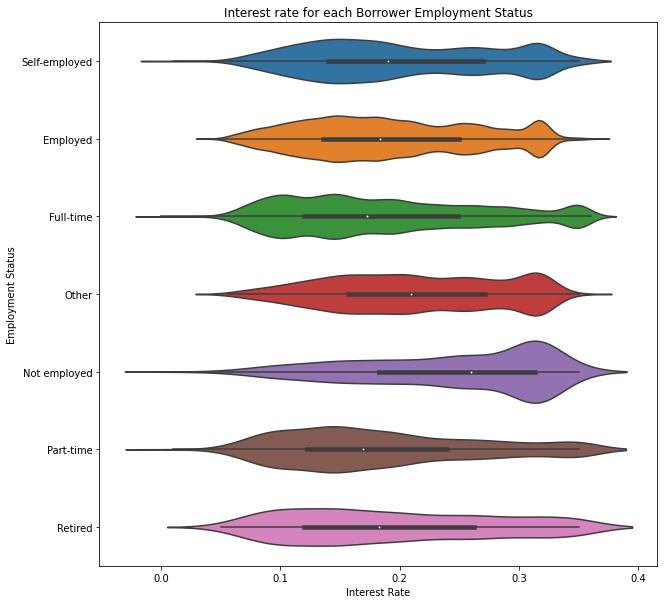

In [6]:
plt.figure(figsize=(10,10));

# Value to drop
drop_na = ['Not available']

# df with with new values
drop_na_df = loans[~loans['EmploymentStatus'].isin(drop_na)]

#plot violin plot
sns.violinplot(y='EmploymentStatus', x='BorrowerRate', data=drop_na_df)
plt.xlabel('Interest Rate')
plt.ylabel('Employment Status')
plt.title('Interest rate for each Borrower Employment Status');

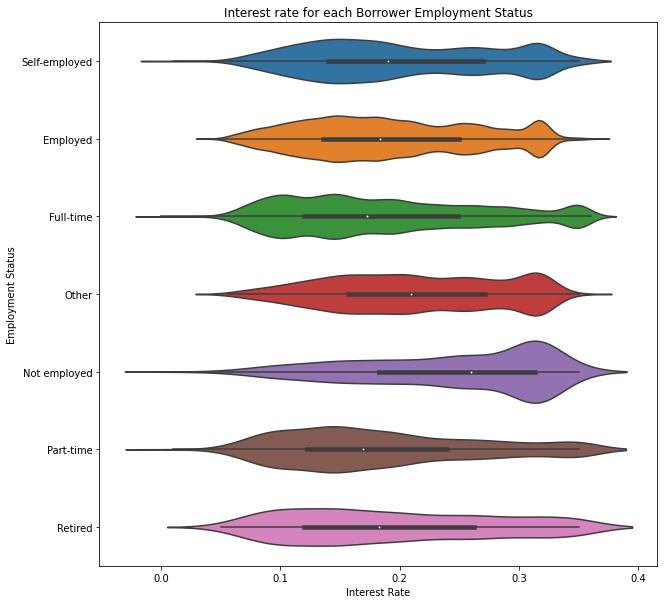

## Interest Rate according to Income Bracket

>  The plot suggests that there is some variation in interest rates within each income bracket, with the range being wider for some income brackets compared to others. It also appears that borrowers in the lower income brackets tend to have higher interest rates on average compared to those in the higher income brackets. 

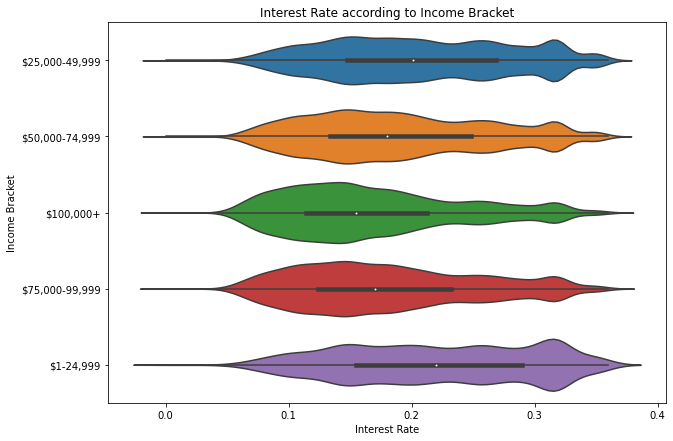

In [7]:
plt.figure(figsize=(10,7))

# Values to drop
to_drop = ['Not employed', '$0', 'Not displayed']

# df with with new values
dropped_range = loans[~loans['IncomeRange'].isin(to_drop)]

#create plot
sns.violinplot(y='IncomeRange', x='BorrowerRate', data=dropped_range)
plt.ylabel('Income Bracket')
plt.xlabel('Interest Rate')
plt.title('Interest Rate according to Income Bracket');

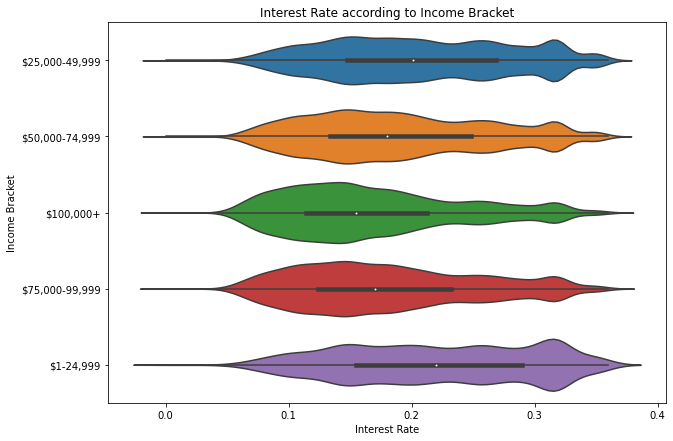

## Employment status, interest rate and homeownership

> The plot helps better understand the relationship between employment status, homeowner status, and interest rate in the loan data. By examining the plot, we can see the notable differences in the interest rates between the different employment status and homeowner status combinations.

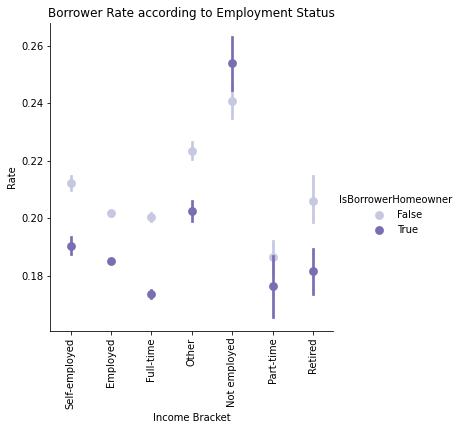

In [8]:
# Values to drop
drop_na = ['Not available']

# df with with new values
drop_na_df = loans[~loans['EmploymentStatus'].isin(drop_na)]

#create joint plot
g=sns.catplot(x='EmploymentStatus', y='BorrowerRate', data=drop_na_df, hue='IsBorrowerHomeowner',
            kind='point', join=False, palette='Purples') 
plt.xticks(rotation=90)
plt.xlabel('Income Bracket')
plt.ylabel('Rate')
plt.title('Borrower Rate according to Employment Status');

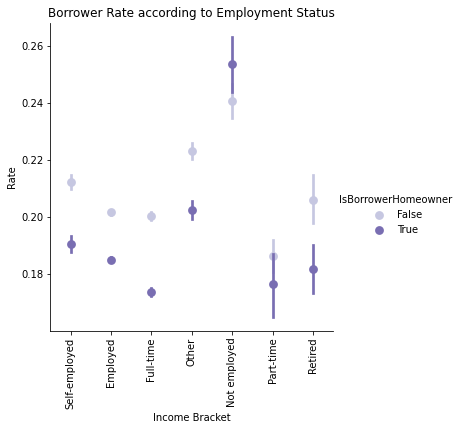

## Conclusions
> It appears that income range and employment status may have a noticeable influence on a borrower's interest rate. From the data, it seems that employed borrowers tend to have lower interest rates compared to other employment statuses. Additionally, homeowners typically have lower interest rates compared to non-homeowners. However, it is worth noting that the effect of homeownership on interest rates is not consistent across different income brackets or employment statuses. In general, these findings suggest that borrowers who are financially stable and have steady employment are more likely to be offered lower interest rates on their loans.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [10]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
